<a href="https://colab.research.google.com/github/rllima/IF704/blob/main/Classification_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from google.colab import drive
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import sklearn

import codecs
from tqdm import tqdm
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
##Metrics functions
#Metrics have been removed from Keras core. You need to calculate them manually. 
#They removed them on 2.0 version. Those metrics are all global metrics, but Keras works in batches. As a result, it might be more misleading than helpful.

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [4]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [4]:
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [5]:
#Download do dataset
import requests, zipfile, io
r = requests.get("http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content/drive/My Drive/IF704")
z.close()

In [7]:
!ls "/content/drive/My Drive/IF704/"

testdata.manual.2009.06.14.csv	training.1600000.processed.noemoticon.csv


In [6]:
df = pd.read_csv("/content/drive/My Drive/IF704/training.1600000.processed.noemoticon.csv",
                 names = ["target","id","date","query","user","text"], header=None, encoding='latin-1')

In [7]:
df.head()

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.dtypes

target     int64
id         int64
date      object
query     object
user      object
text      object
dtype: object

In [9]:
df.target.unique()

array([0, 4])

In [10]:
df.target = df.target.replace(to_replace=4,value=1)

In [11]:
df.target.unique()

array([0, 1])

Pré Processamento do texto

In [12]:
df_preprocess = df.copy()
tweets = df_preprocess.text.copy()
tweets

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [13]:
def removeWordWithChar(text, char_list):
    text = text.split()
    res = [ele for ele in text if all(ch not in ele for ch in char_list)]
    res = ' '.join(res)
    return res

char_list = ['@', '#', 'http', 'www', '/']

removeWordWithChar(tweets[1], char_list)

"is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!"

In [14]:
tweets_cleaned = []
for t in tweets:
    tweets_cleaned.append(removeWordWithChar(t, char_list))

In [15]:
def tokenize(texts):
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    texts_tokens = []
    for i, val in enumerate(texts):
        text_tokens = tokenizer.tokenize(val.lower())

        for i in range(len(text_tokens) - 1, -1, -1):
            if len(text_tokens[i]) < 4:
                del(text_tokens[i])

        texts_tokens.append(text_tokens)
        
    return texts_tokens

In [16]:
tweets_tokens = tokenize(tweets_cleaned)

In [17]:
def removeSW(texts_tokens):
    stopWords = set(stopwords.words('english'))
    texts_filtered = []

    for i, val in enumerate(texts_tokens):
        text_filtered = []
        for w in val:
            if w not in stopWords:
                text_filtered.append(w)
        texts_filtered.append(text_filtered)
        
    return texts_filtered

In [18]:
tweets_filtered = removeSW(tweets_tokens)

In [19]:
def lemma(texts_filtered):
    wordnet_lemmatizer = WordNetLemmatizer()
    texts_lem = []

    for i, val in enumerate(texts_filtered):
        text_lem = []
        for word in val:
            text_lem.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        texts_lem.append(text_lem)
    
    return texts_lem

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:


tweets_lem = lemma(tweets_filtered)

In [22]:
tweets_ready = []
for tweet in tweets_lem:
    string = ' '
    string = string.join(tweet)
    tweets_ready.append(string)

In [25]:
df_preprocess['tweet'] = tweets_ready

In [26]:
df_preprocess = df_preprocess[["target","tweet"]]

In [30]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [35]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_preprocess.tweet)

word_index = tokenizer.word_index
vocabulary_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocabulary_size)

Vocabulary Size : 249874


In [27]:
DATASET_SIZE = df_preprocess.shape[0]

In [28]:
target = df_preprocess.pop('target')
dataset = tf.data.Dataset.from_tensor_slices((df_preprocess.tweet.values, target.values))

Transformaçãp do formato pandas para Ts

In [29]:
train_size = int(0.8 * DATASET_SIZE)
test_size = int(0.2 * DATASET_SIZE)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
test_dataset = test_dataset.take(test_size)

In [30]:
print(f'Train_size: {train_size}\nTest_size: {test_size}')

Train_size: 1280000
Test_size: 320000


In [ ]:
MAX_SEQUENCE_LENGTH = 100

In [31]:
BUFFER_SIZE = 10000
BATCH_SIZE = 1024

In [32]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [33]:
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [36]:

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=vocabulary_size)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [37]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'work', 'go', 'like', 'good', 'today', 'quot', 'miss',
       'love', 'time', 'think', 'want', 'back', 'know', 'feel', 'make',
       'really', 'thank', 'still'], dtype='<U113')

In [38]:
encoded_example = encoder("I like so much")[:3].numpy()
encoded_example

array([33835,     4,     1])

Traning Model - A (RNN)

In [41]:
model_A = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=vocabulary_size,
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [42]:
# predict on a sample text without padding.

sample_text = ('The movie was cool')
sample_text2 = ('The movie was bad')
predictions = model_A.predict(np.array([sample_text]))
print(predictions[0])
predictions = model_A.predict(np.array([sample_text2]))
print(predictions[0])

[0.0010631]
[0.00128994]


In [43]:
model_A.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy',f1_m])

In [44]:
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 64)          15991936  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,066,305
Trainable params: 16,066,305
Non-trainable params: 0
_________________________________________________________________


In [45]:
%%time
history_A = model_A.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
1250/1250 [==============================] - 293s 229ms/step - loss: 0.4999 - accuracy: 0.8152 - f1_m: 0.1956 - val_loss: 0.0981 - val_accuracy: 1.0000 - val_f1_m: 1.0000
Epoch 2/10
1250/1250 [==============================] - 284s 227ms/step - loss: 0.5150 - accuracy: 0.6695 - f1_m: 0.1162 - val_loss: 0.1843 - val_accuracy: 0.9955 - val_f1_m: 0.9977
Epoch 3/10
1250/1250 [==============================] - 285s 228ms/step - loss: 0.3016 - accuracy: 0.8784 - f1_m: 0.3045 - val_loss: 0.0518 - val_accuracy: 0.9930 - val_f1_m: 0.9965
Epoch 4/10
1250/1250 [==============================] - 285s 228ms/step - loss: 0.2755 - accuracy: 0.8943 - f1_m: 0.3243 - val_loss: 0.0502 - val_accuracy: 0.9890 - val_f1_m: 0.9945
Epoch 5/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.2660 - accuracy: 0.8966 - f1_m: 0.3275 - val_loss: 0.0482 - val_accuracy: 0.9868 - val_f1_m: 0.9933
Epoch 6/10
1250/1250 [==============================] - 292s 234ms/step - loss: 0.2596 - a

In [46]:
test_loss, test_acc, test_f1 = model_A.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test F1:', test_f1)

313/313 [==============================] - 5s 16ms/step - loss: 0.0452 - accuracy: 0.9845 - f1_m: 0.9922
Test Loss: 0.045196015387773514
Test Accuracy: 0.9845437407493591
Test F1: 0.9922008514404297


In [47]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5385579125955701)

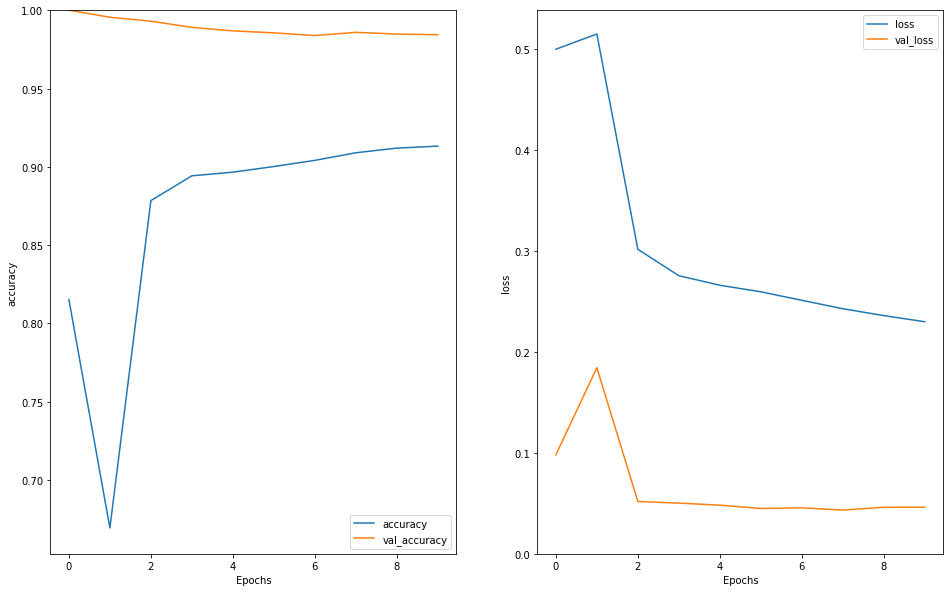

In [48]:
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_A, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_A, 'loss')
plt.ylim(0, None)


In [ ]:
##Second configuration

In [49]:
model_B = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [50]:
model_B.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy',f1_m])

In [ ]:
history_B = model_B.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
 280/1250 [=====>........................] - ETA: 4:49 - loss: 0.0495 - accuracy: 1.0000 - f1_m: 0.0000e+00

In [ ]:
test_loss, test_acc, test_f1 = model_B.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test F1:', test_f1)

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
sample_text2 = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
predictions2 = model.predict(np.array([sample_text2]))
print(predictions,predictions2)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')